In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install library pandas
!pip install pandas

In [ ]:
# Import library pandas
import pandas as pd

In [ ]:
# Membaca dan merubah dataset menjadi sebuah dataframe
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/bbc-text.csv")

In [ ]:
# Menampilkan dataframe
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
# Menampilkan dataframe terakhir
df.tail

<bound method NDFrame.tail of            category                                               text
0              tech  tv future in the hands of viewers with home th...
1          business  worldcom boss  left books alone  former worldc...
2             sport  tigers wary of farrell  gamble  leicester say ...
3             sport  yeading face newcastle in fa cup premiership s...
4     entertainment  ocean s twelve raids box office ocean s twelve...
...             ...                                                ...
2220       business  cars pull down us retail figures us retail sal...
2221       politics  kilroy unveils immigration policy ex-chatshow ...
2222  entertainment  rem announce new glasgow concert us band rem h...
2223       politics  how political squabbles snowball it s become c...
2224          sport  souness delight at euro progress boss graeme s...

[2225 rows x 2 columns]>

In [ ]:
# Cek apakah dataset terdapat nilai yang kosong
df.isna().sum()

category    0
text        0
dtype: int64

In [ ]:
# Menghitung jumlah berdasar kategori pada attribute category
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [ ]:
# Melakukan one-hot-encoding dan membuat dataframe baru
category_news = pd.get_dummies(df.category)
df_baru = pd.concat([df, category_news], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [ ]:
# Mengubah nilai dataframe ke tipe data numpy array menggunakan atribut values
text = df_baru['text'].values
label = df_baru[['sport', 'business', 'politics', 'tech', 'entertainment']].values

In [ ]:
# Membagi data untuk training dan data untuk testing dengan Validation set sebesar 20% dari total dataset
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

In [ ]:
# Mengubah kata ke bilangan numerik dengan Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)
 
sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
# Membuat model dengan menggunakan model sequential, embedding, dan LSTM
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Penggunaan callbacks
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.85):
      print("Training dihentikan karena akurasi pada training set dan validation set sudah mencapai 0.92")
      self.model.stop_training = True

callbacks = Callback()

In [ ]:
# Pelatihan model
num_epochs = 30
history = model.fit(padded_train, label_train, batch_size=128, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
14/14 - 89s - loss: 1.6082 - accuracy: 0.2292 - val_loss: 1.5987 - val_accuracy: 0.2629
Epoch 2/30
14/14 - 84s - loss: 1.6009 - accuracy: 0.2680 - val_loss: 1.5851 - val_accuracy: 0.3685
Epoch 3/30
14/14 - 85s - loss: 1.5830 - accuracy: 0.3376 - val_loss: 1.5106 - val_accuracy: 0.4876
Epoch 4/30
14/14 - 84s - loss: 1.3985 - accuracy: 0.4208 - val_loss: 1.2207 - val_accuracy: 0.5101
Epoch 5/30
14/14 - 83s - loss: 1.2397 - accuracy: 0.4360 - val_loss: 1.1789 - val_accuracy: 0.5326
Epoch 6/30
14/14 - 83s - loss: 1.1251 - accuracy: 0.4584 - val_loss: 1.0066 - val_accuracy: 0.5169
Epoch 7/30
14/14 - 82s - loss: 1.0104 - accuracy: 0.4972 - val_loss: 0.9117 - val_accuracy: 0.5551
Epoch 8/30
14/14 - 83s - loss: 0.9107 - accuracy: 0.5624 - val_loss: 0.8743 - val_accuracy: 0.6719
Epoch 9/30
14/14 - 84s - loss: 0.8439 - accuracy: 0.6528 - val_loss: 0.8417 - val_accuracy: 0.6247
Epoch 10/30
14/14 - 83s - loss: 0.7871 - accuracy: 0.6927 - val_loss: 0.8692 - val_accuracy: 0.5978
Epoch 11/

In [ ]:
# Evaluasi model
model.evaluate(padded_test, label_test)

14/14 [==============================] - 3s 182ms/step - loss: 0.4311 - accuracy: 0.8539


[0.43107765913009644, 0.8539325594902039]

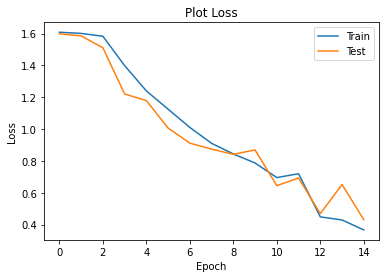

In [ ]:
# Visualisasi plot loss saat training dan validation
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

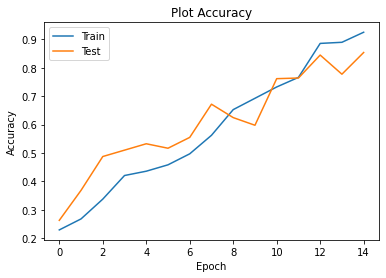

In [ ]:
# Visualisasi plot accuracy saat training dan validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Plot Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
Sumber dataset: https://www.kaggle.com/yufengdev/bbc-fulltext-and-category